# EDA and Feature engineering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


## Data Exploration and EDA

In [2]:
raw_data = pd.read_csv("../data/SpotifyFeatures.csv")
raw_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'valence'}>, <Axes: >]], dtype=object)

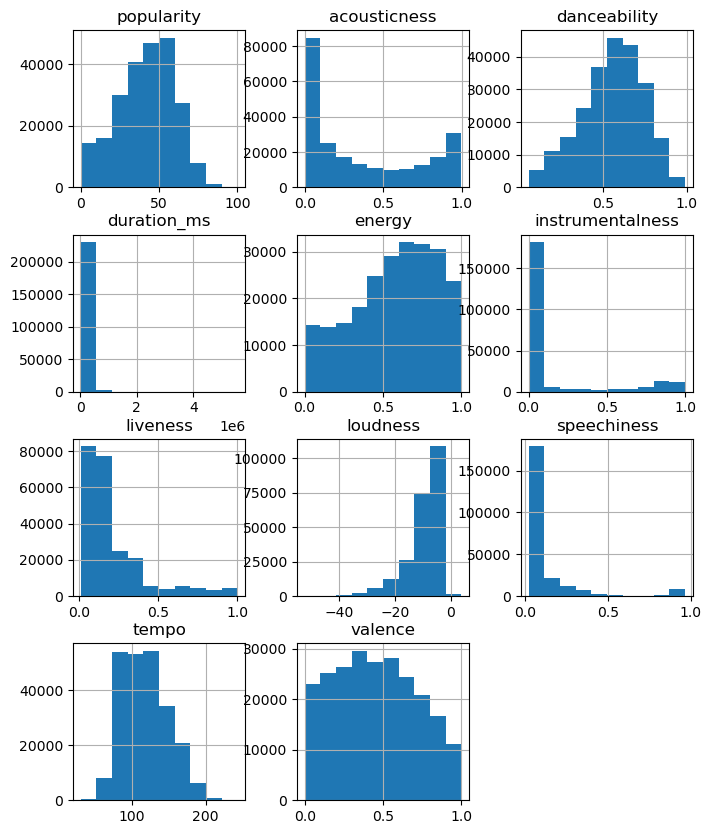

In [6]:
raw_data.hist(figsize=(8, 10))

In [7]:
raw_data.key.value_counts()
raw_data.key.nunique()

12

In [8]:
raw_data.artist_name.value_counts()

Giuseppe Verdi              1394
Giacomo Puccini             1137
Kimbo Children's Music       971
Nobuo Uematsu                825
Richard Wagner               804
                            ... 
Zubin Mehta                    1
Shawn Lane                     1
Claudio Arrau                  1
Charles Daellenbach            1
Jr Thomas & The Volcanos       1
Name: artist_name, Length: 14564, dtype: int64

In [9]:
raw_data['mode'].value_counts()

Major    151744
Minor     80981
Name: mode, dtype: int64

## Average song popularity for each artist

Text(0.5, 1.0, 'Distribution for average song popularity of each artist')

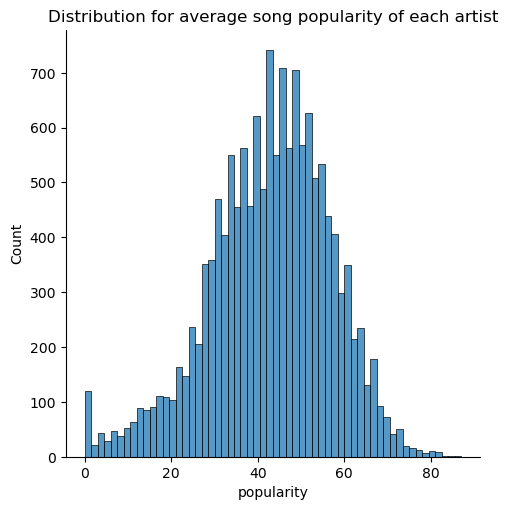

In [10]:
artist_popularity = raw_data.groupby("artist_name")["popularity"].mean().sort_values(ascending= False)
artist_popularity = pd.DataFrame(artist_popularity)
sns.displot(artist_popularity["popularity"])
plt.title("Distribution for average song popularity of each artist")


## Clean time Signature Column: Drop time signature = 0/4

There are only 8 rows having time_signature = 0/4, so we assume this would be a typo and decide to drop these rows.

In [11]:
raw_data.time_signature.value_counts()

4/4    200760
3/4     24111
5/4      5238
1/4      2608
0/4         8
Name: time_signature, dtype: int64

In [12]:
time_sig_04 = raw_data[raw_data["time_signature"] == '0/4']
time_sig_04

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
14520,Dance,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,60,0.184,0.619,257560,0.539000,0.000000,C,0.2880,-6.900,Major,0.3870,145.618,0/4,0.4240
59106,Opera,Tomaso Albinoni,Adagio for Strings and Organ in G minor (Arr. ...,2TtDdCiJNjhHYTPrJIbekb,14,0.869,0.193,395293,0.107000,0.857000,C,0.1170,-20.963,Minor,0.0462,119.472,0/4,0.0377
80544,Opera,Giuseppe Verdi,"Aida: Numi, pietà del mio martir",7Gm2vZoivw8NME9tOS3Opt,12,0.966,0.255,90560,0.045600,0.019000,C#,0.0613,-28.187,Major,0.0523,141.904,0/4,0.0349
82665,Opera,Giuseppe Di Stefano,Fra poco a me ricovero,5lpR2oQQbt1iTrMZIlIP46,12,0.973,0.301,197333,0.105000,0.000019,D,0.0838,-16.219,Major,0.0400,99.886,0/4,0.2470
111059,Pop,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,61,0.184,0.619,257560,0.539000,0.000000,C,0.2880,-6.900,Major,0.3870,145.618,0/4,0.4240
115895,Rap,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,61,0.184,0.619,257560,0.539000,0.000000,C,0.2880,-6.900,Major,0.3870,145.618,0/4,0.4240
167567,Comedy,Ron White,Good to Be in Austin/Airport Security/Broke Tooth,0LMQasA6Y5UEMuWzRY5aSX,41,0.942,0.440,290123,0.532000,0.000000,F,0.9060,-20.569,Major,0.9440,83.029,0/4,0.0672
208898,World,Aphex Twin,Nanou2,6Wei2NUSG66WzLiqSuQAy5,41,0.977,0.338,205187,0.000982,0.239000,G#,0.0966,-28.820,Major,0.0465,93.066,0/4,0.0776


In [13]:
# drop rows with time_signature = 0/4
cleaned_data = raw_data[raw_data["time_signature"] != '0/4']
# Check if we delete them successfully
cleaned_data[cleaned_data["time_signature"] == '0/4']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


## Clean Genre column: Merge Children's Music

There are two repetitive "Children’s Music " genra in the dataframe. Merger them togther into a single genre.

In [14]:
cleaned_data.genre.value_counts()

Comedy              9680
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9385
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9231
World               9095
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8700
Country             8664
Opera               8277
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [19]:
print(list(cleaned_data.genre.unique()))


['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance', 'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop', "Children's Music", 'Children’s Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack', 'World']


In [ ]:
# expected = ['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance', 
#             'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop', "Children's Music", 
#             'Children’s Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 
#             'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack', 'World']


In [23]:
music = cleaned_data["genre"].unique()
music1 = "Children's Music"
music2 = "Children’s Music"


In [24]:
cleaned_data["genre"].replace(music1 , music2,inplace = True)
cleaned_data.genre.value_counts()

/var/folders/16/rkk1ds7n4m9bxdsglkr6n8680000gn/T/ipykernel_7223/17757951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data["genre"].replace(music1 , music2,inplace = True)


Children’s Music    14756
Comedy               9680
Soundtrack           9646
Indie                9543
Jazz                 9441
Pop                  9385
Electronic           9377
Folk                 9299
Hip-Hop              9295
Rock                 9272
Alternative          9263
Classical            9256
Rap                  9231
World                9095
Soul                 9089
Blues                9023
R&B                  8992
Anime                8936
Reggaeton            8927
Ska                  8874
Reggae               8771
Dance                8700
Country              8664
Opera                8277
Movie                7806
A Capella             119
Name: genre, dtype: int64

## One hot encoding

In [52]:
df_grouped = cleaned_data.groupby('track_id')['genre'].agg(list).reset_index()
# Create dummy variables for each “genre” value
dummy_vars = pd.get_dummies(df_grouped['genre'].apply(pd.Series).stack()).sum(level=0)
# Join the dummy variables with the original dataframe
df_with_dummies = pd.concat([df_grouped, dummy_vars], axis=1)
df_sub = df_with_dummies.drop(['genre'], axis = 1)
df_new = pd.merge(df_sub, cleaned_data.drop_duplicates("track_id"), on="track_id").drop(["genre"], axis =1 )
df_new


/var/folders/16/rkk1ds7n4m9bxdsglkr6n8680000gn/T/ipykernel_7983/1359452430.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy_vars = pd.get_dummies(df_grouped['genre'].apply(pd.Series).stack()).sum(level=0)


,track_id,A Capella,Alternative,Anime,Blues,Children’s Music,Classical,Comedy,Country,Dance,Electronic,Folk,Hip-Hop,Indie,Jazz,Movie,Opera,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,00021Wy6AyMbLP2tqij86e,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Capcom Sound Team,Zangief's Theme,13,0.2340,0.617,169173,0.862,0.976000,G,0.1410,-12.855,Major,0.0514,129.578,4/4,0.886
1,000CzNKC8PEt1yC3L8dqwV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Henri Salvador,Coeur Brisé à Prendre - Remastered,5,0.2490,0.518,130653,0.805,0.000000,F,0.3330,-6.248,Major,0.0407,79.124,4/4,0.841
2,000DfZJww8KiixTKuk9usJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Mike Love,Earthlings,30,0.3660,0.631,357573,0.513,0.000004,D,0.1090,-6.376,Major,0.0293,120.365,4/4,0.307
3,000EWWBkYaREzsBplYjUag,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Don Philippe,Fewerdolr,39,0.8150,0.768,104924,0.137,0.922000,C#,0.1130,-13.284,Minor,0.0747,76.430,4/4,0.560
4,000xQL6tZNLJzIrtIgxqSl,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,ZAYN,Still Got Time,70,0.1310,0.748,188491,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176763,7zz7MbCb9G7KJc1NVl9bL0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Caravan Palace,Maniac,38,0.4000,0.851,251267,0.790,0.230000,C,0.1230,-4.641,Minor,0.0309,111.993,4/4,0.889
176764,7zzFNNxVD0h0ctAT08H0pa,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Thelonious Monk Quartet,Crepescule With Nellie - Live At Carnegie Hall...,40,0.9730,0.538,266933,0.144,0.177000,G#,0.3590,-17.711,Major,0.0569,135.640,3/4,0.110
176765,7zzTeItz93lYI52hlcipm5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Magnate Y Valentino,Una En Un Millón,28,0.1130,0.716,228493,0.806,0.000000,G,0.1510,-5.913,Minor,0.1350,136.069,4/4,0.544
176766,7zzZmpw8L66ZPjH1M6qmOs,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Moonstar88,Migraine,67,0.2170,0.664,267960,0.537,0.000003,D,0.1180,-6.000,Major,0.0290,115.049,4/4,0.221


In [53]:
one_hot_cols = ["key", "time_signature", "mode"]
one_hot = pd.get_dummies(df_new[one_hot_cols])
df_new = pd.concat([df_new, one_hot], axis=1)
df_new

,track_id,A Capella,Alternative,Anime,Blues,Children’s Music,Classical,Comedy,Country,Dance,Electronic,Folk,Hip-Hop,Indie,Jazz,Movie,Opera,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4,mode_Major,mode_Minor
0,00021Wy6AyMbLP2tqij86e,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Capcom Sound Team,Zangief's Theme,13,0.2340,0.617,169173,0.862,0.976000,G,0.1410,-12.855,Major,0.0514,129.578,4/4,0.886,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,000CzNKC8PEt1yC3L8dqwV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Henri Salvador,Coeur Brisé à Prendre - Remastered,5,0.2490,0.518,130653,0.805,0.000000,F,0.3330,-6.248,Major,0.0407,79.124,4/4,0.841,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,000DfZJww8KiixTKuk9usJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Mike Love,Earthlings,30,0.3660,0.631,357573,0.513,0.000004,D,0.1090,-6.376,Major,0.0293,120.365,4/4,0.307,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,000EWWBkYaREzsBplYjUag,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Don Philippe,Fewerdolr,39,0.8150,0.768,104924,0.137,0.922000,C#,0.1130,-13.284,Minor,0.0747,76.430,4/4,0.560,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,000xQL6tZNLJzIrtIgxqSl,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,ZAYN,Still Got Time,70,0.1310,0.748,188491,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.524,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176763,7zz7MbCb9G7KJc1NVl9bL0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Caravan Palace,Maniac,38,0.4000,0.851,251267,0.790,0.230000,C,0.1230,-4.641,Minor,0.0309,111.993,4/4,0.889,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
176764,7zzFNNxVD0h0ctAT08H0pa,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Thelonious Monk Quartet,Crepescule With Nellie - Live At Carnegie Hall...,40,0.9730,0.538,266933,0.144,0.177000,G#,0.3590,-17.711,Major,0.0569,135.640,3/4,0.110,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
176765,7zzTeItz93lYI52hlcipm5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Magnate Y Valentino,Una En Un Millón,28,0.1130,0.716,228493,0.806,0.000000,G,0.1510,-5.913,Minor,0.1350,136.069,4/4,0.544,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
176766,7zzZmpw8L66ZPjH1M6qmOs,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Moonstar88,Migraine,67,0.2170,0.664,267960,0.537,0.000003,D,0.1180,-6.000,Major,0.0290,115.049,4/4,0.221,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [54]:
df_new.columns

Index(['track_id', 'A Capella', 'Alternative', 'Anime', 'Blues',
       'Children’s Music', 'Classical', 'Comedy', 'Country', 'Dance',
       'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Movie', 'Opera',
       'Pop', 'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul',
       'Soundtrack', 'World', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'key_A', 'key_A#',
       'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F',
       'key_F#', 'key_G', 'key_G#', 'time_signature_1/4', 'time_signature_3/4',
       'time_signature_4/4', 'time_signature_5/4', 'mode_Major', 'mode_Minor'],
      dtype='object')

## Drop unnecessary columns

In [55]:
drop_cols = ["artist_name","track_name","key", "mode", "time_signature", "track_id"]
df_new.drop(drop_cols, axis = 1, inplace=True)
df_new

,A Capella,Alternative,Anime,Blues,Children’s Music,Classical,Comedy,Country,Dance,Electronic,Folk,Hip-Hop,Indie,Jazz,Movie,Opera,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4,mode_Major,mode_Minor
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0.2340,0.617,169173,0.862,0.976000,0.1410,-12.855,0.0514,129.578,0.886,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0.2490,0.518,130653,0.805,0.000000,0.3330,-6.248,0.0407,79.124,0.841,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,30,0.3660,0.631,357573,0.513,0.000004,0.1090,-6.376,0.0293,120.365,0.307,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,39,0.8150,0.768,104924,0.137,0.922000,0.1130,-13.284,0.0747,76.430,0.560,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,70,0.1310,0.748,188491,0.627,0.000000,0.0852,-6.029,0.0644,120.963,0.524,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176763,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,38,0.4000,0.851,251267,0.790,0.230000,0.1230,-4.641,0.0309,111.993,0.889,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
176764,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,40,0.9730,0.538,266933,0.144,0.177000,0.3590,-17.711,0.0569,135.640,0.110,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
176765,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,28,0.1130,0.716,228493,0.806,0.000000,0.1510,-5.913,0.1350,136.069,0.544,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
176766,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,67,0.2170,0.664,267960,0.537,0.000003,0.1180,-6.000,0.0290,115.049,0.221,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [56]:
df_new.columns

Index(['A Capella', 'Alternative', 'Anime', 'Blues', 'Children’s Music',
       'Classical', 'Comedy', 'Country', 'Dance', 'Electronic', 'Folk',
       'Hip-Hop', 'Indie', 'Jazz', 'Movie', 'Opera', 'Pop', 'R&B', 'Rap',
       'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul', 'Soundtrack', 'World',
       'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D',
       'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#',
       'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',
       'time_signature_5/4', 'mode_Major', 'mode_Minor'],
      dtype='object')

## Save the cleaned data ready for training

In [58]:
df_new.to_csv("cleaned_data.csv", index = False)